# Exercise 5


In [3]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1


In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

# fluctuate each pixel's intensity by drawing from a gaussian
# with mean equal to the pixels value and std=4
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
noisy_data=digits.data + noisy 

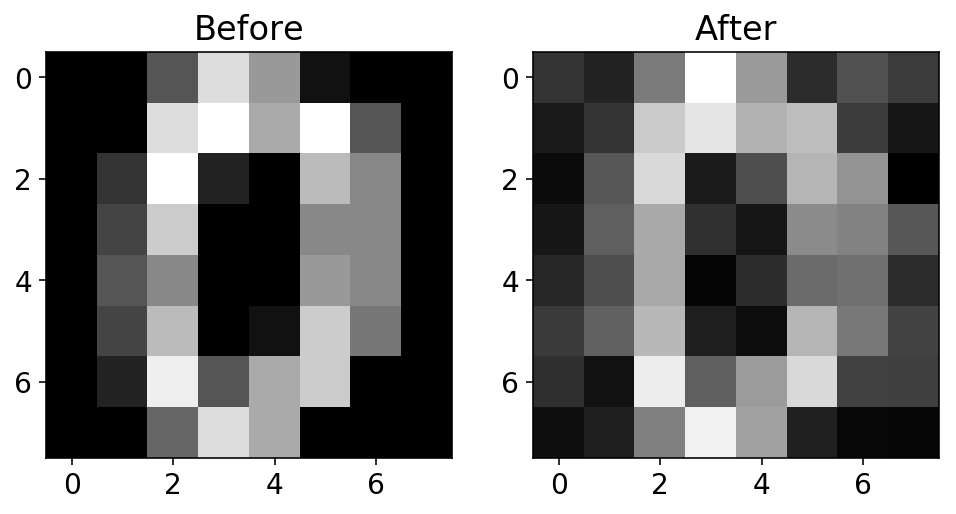

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(2*4, 4))
axs[0].imshow( digits.data[0].reshape(8,8), cmap='gray');
axs[1].imshow(noisy_data[0].reshape(8,8), cmap='gray');
axs[0].set_title("Before")
axs[1].set_title("After")

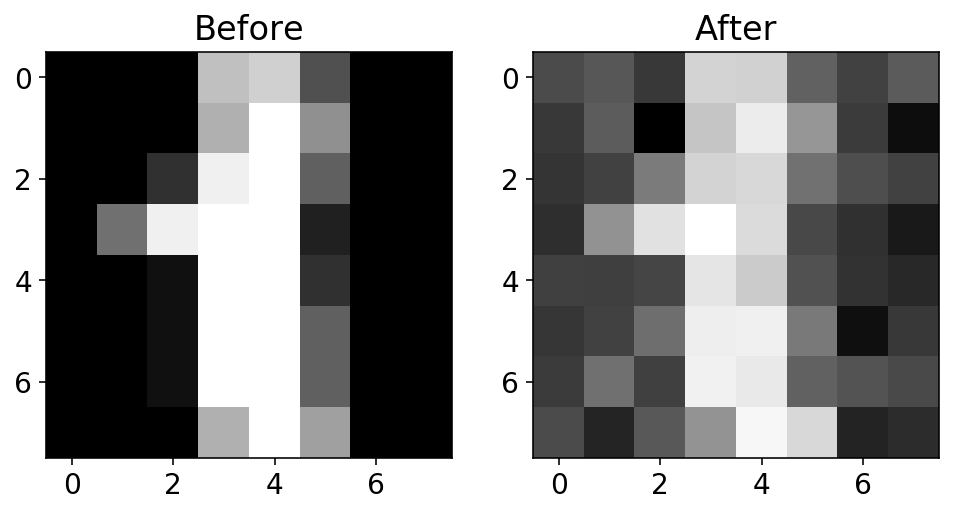

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(2*4, 4))
axs[0].imshow( digits.data[1].reshape(8,8), cmap='gray');
axs[1].imshow(noisy_data[1].reshape(8,8), cmap='gray');
axs[0].set_title("Before")
axs[1].set_title("After")

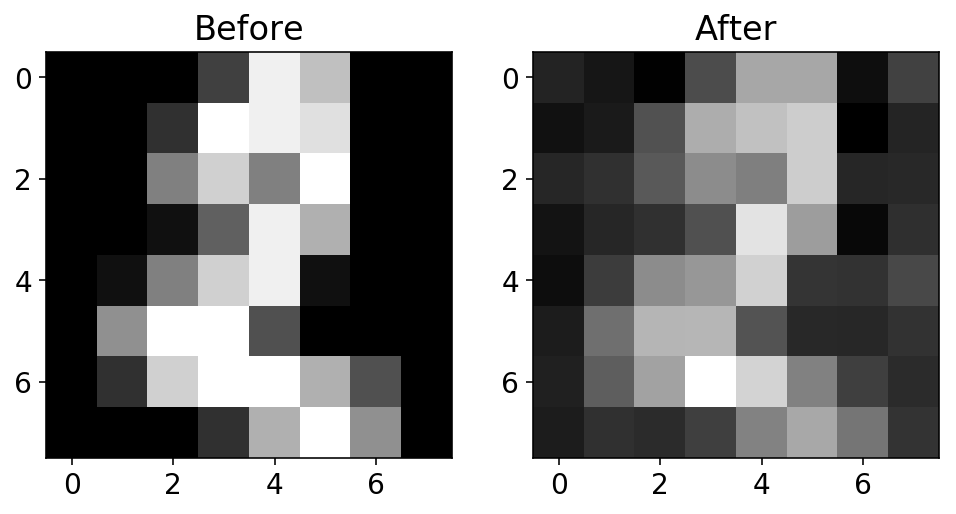

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(2*4, 4))
axs[0].imshow( digits.data[2].reshape(8,8), cmap='gray');
axs[1].imshow(noisy_data[2].reshape(8,8), cmap='gray');
axs[0].set_title("Before")
axs[1].set_title("After")

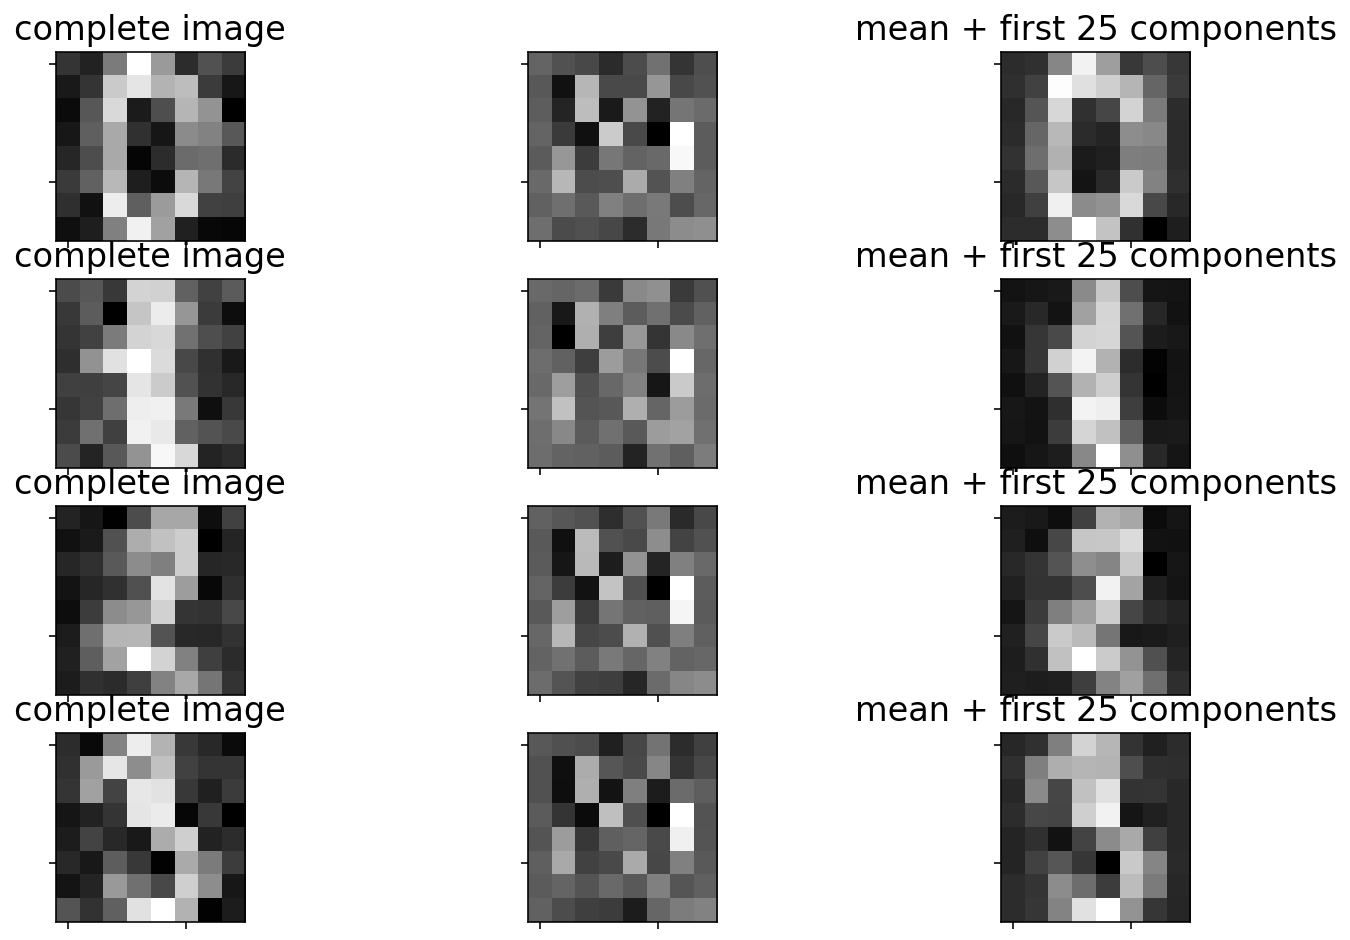

In [7]:
from sklearn.decomposition import PCA

def show_digit(n_components=25):
    fig, axs = plt.subplots(4, 3, figsize=(12, 2*4))

    for n in range(4):
        #digit = digits.data[n]
        digit = noisy_data[n]
        ax = axs[n,0]
        ax.set_title('complete image')
        ax.imshow(digit.reshape(8,8), cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        pca = PCA(n_components)
        pca.fit(noisy_data)

        # components
        ax = axs[n,1]
        if n_components == 1:
            template = pca.mean_.reshape(8,8)
        else:
            template = pca.components_[n_components-1].reshape(8,8)
        template = pca.components_[n_components-1].reshape(8,8)
        ax.imshow(template, cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        ax = axs[n,2]
        ax.imshow(pca.inverse_transform(pca.transform(digit.reshape(1, -1))).reshape(8,8), 
                  cmap='gray')
        ax.set_title('mean + first %i components' % (n_components))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()
    
from ipywidgets import interact

interact(show_digit, n_components=(1,63));


---

## Question 2

Apply PCA to a dataset that contains two gaussian blobs. Imagine this is a toy version of a real problem where you are trying to separate the dark from the light points. Before using the `PCA` transformer make a prediction for the two principle components from your intuition.

* draw the principle components PCA finds
* reduce the dimensionality of the data to one dimension using the `transform` method of the `PCA` transformer
* plot your transformed dataset, can you separate the two classes using only the first principle component?
* A technique related to PCA that makes use of the class labels is called linear discriminant analysis (LDA). How does LDA perform on this problem?
* Can you explain why PCA fails?

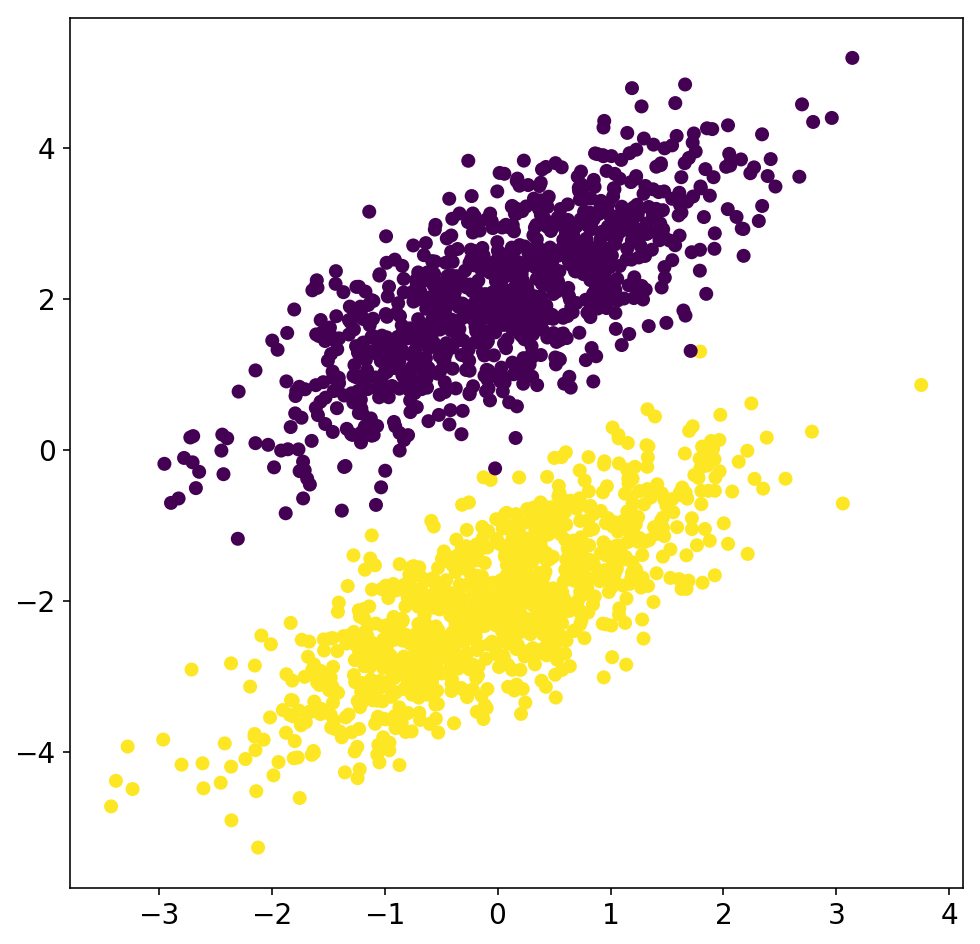

In [8]:
N = 1000
m1 = (1,1)
m2 = (1,4)
C = ((1,0.75), (0.75,1))
g1 = np.random.multivariate_normal((0, -2), C, N)
g2 = np.random.multivariate_normal((0, +2), C, N)

X = np.vstack((g1, g2))
y = np.hstack((np.ones(N), np.zeros(N)))

plt.scatter(X[:,0], X[:,1], c=y);

In [9]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

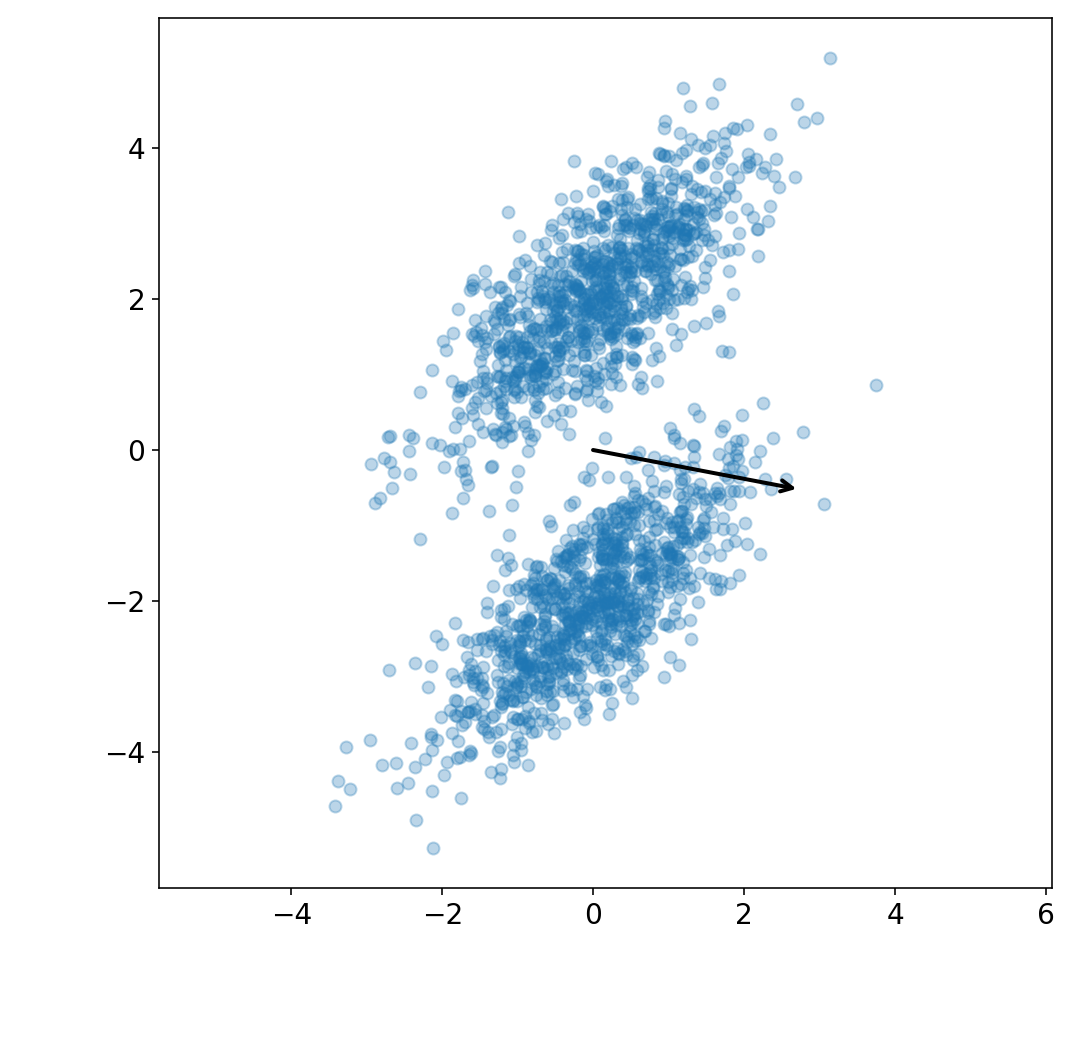

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

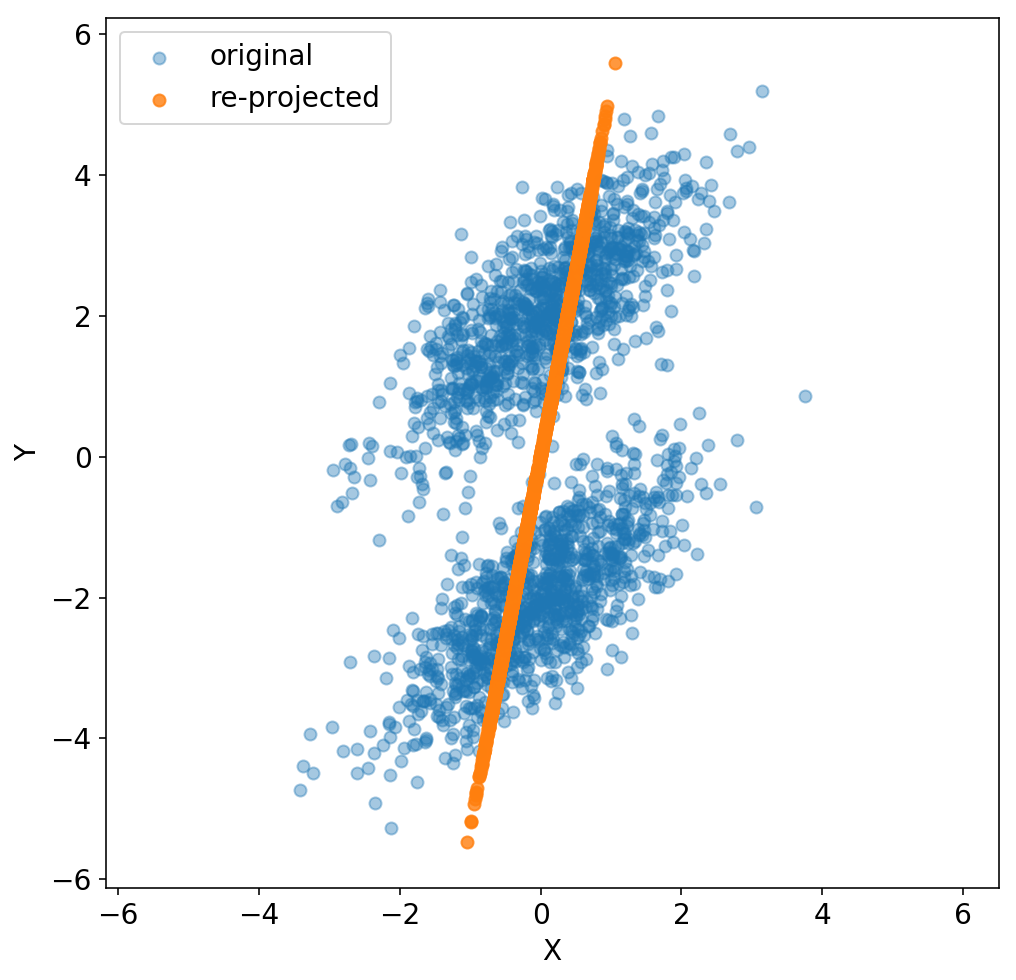

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, label='original')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label='re-projected')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='best')
plt.axis('equal');

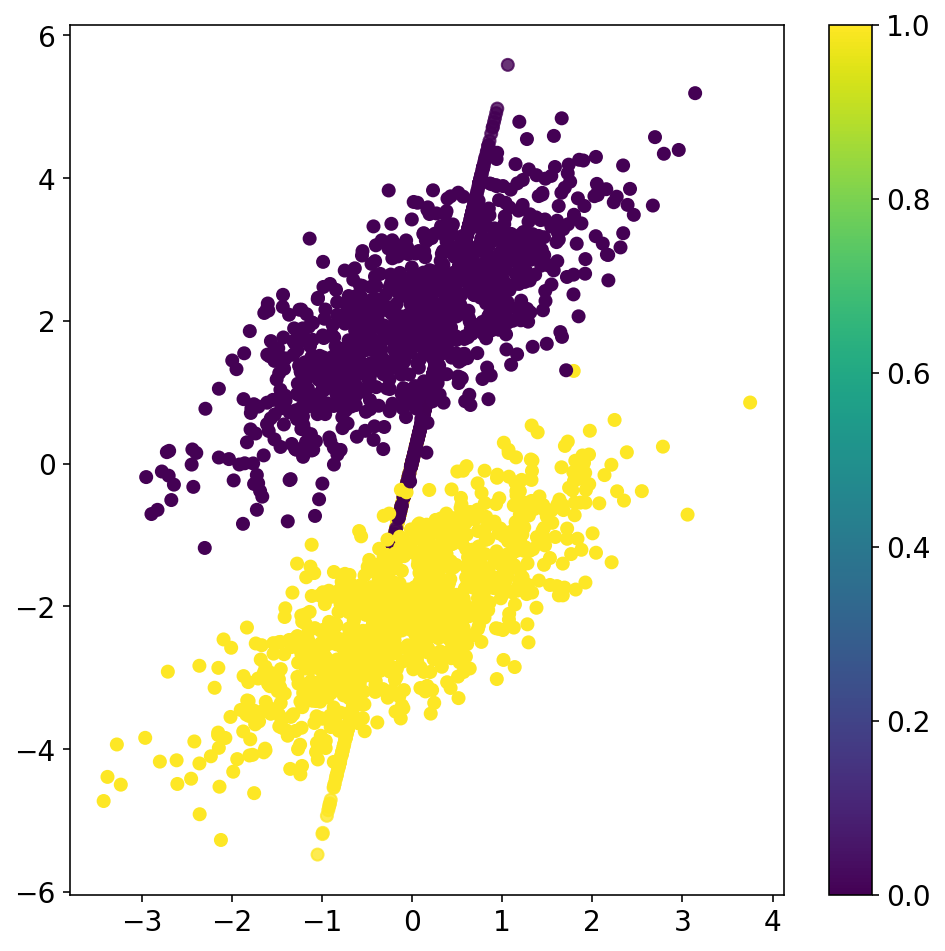

In [37]:
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, c=y, label='re-projected')
plt.scatter(X[:,0], X[:,1], c=y);
plt.colorbar();

### Comments
It is not possible to separate the two classes using only the first principle component.

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def inverse_transform(lda, x):

    inv = np.linalg.pinv(lda.scalings_)

    if lda.solver == 'svd':
        x_back = np.dot(x, inv) + lda.xbar_
    elif lda.solver == 'eigen':
        x_back = np.dot(x, inv)

    return x_back
#I have found this function (http://stackoverflow.com/questions/42957962/linear-discriminant-analysis-inverse-transform)


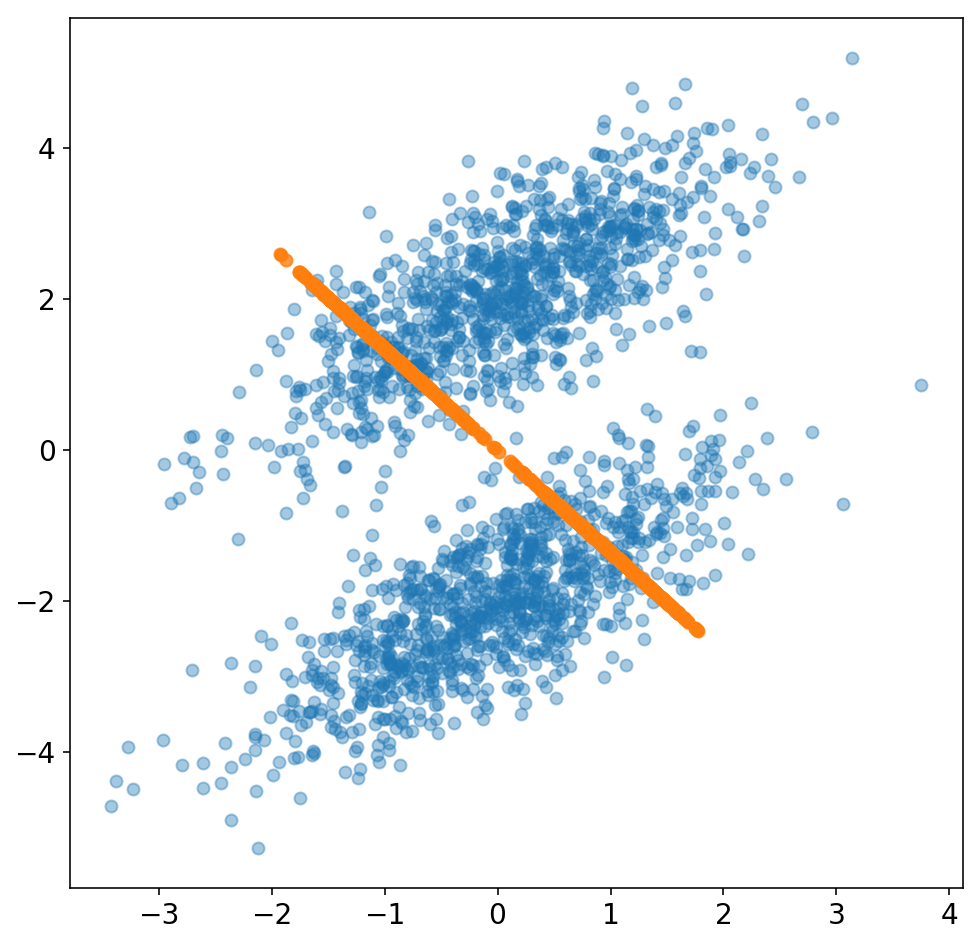

In [13]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, y).transform(X)
X_l_new = inverse_transform(lda, X_lda)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, label='original')
plt.scatter(X_l_new[:, 0], X_l_new[:, 1], alpha=0.8, label='re-projected')

### Comments
LDA does not do a good job either. PCA fails because it works by identifying the attributes that account for the most variance in the data while LDA tries to find attributes that account for the most variance between classes.

## Question 3

Create a simple Auto Encoder using `keras`. By forcing the input through a bottleneck we can hope that the auto encoder focusses on interesting structure in the data and ignores noise. Maybe auto encoders can be used to perform denoising.

* create your own auto encoder setup or start from the one shown in the lecture. You might have to construct a auto encoder that has more layers or uses more powerful transformations like `Conv2D`, `MaxPooling2D` and `Upsampling2D`.
* make sure to load the MNIST dataset from `keras` and not the digits dataset from scikit-learn. Create a noisy version of your digits by drawing pixel values from a gaussian with mean equal to each pixel's intensity and a small standard deviation (tip: start with little/no noise to debug your auto encoder and then slowly increase the noise)
* how do you need to modify the learning setup compared to the lecture where we use `X_train` both as input and as output?

(Bonus: can you learn an "auto encoder" that rotates clean digits by 90degrees? This shuold start you off thinking about using neural networks as general purpose "transformers".)

In [16]:
from keras.datasets import mnist
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28)

#Normalize x_train by 255. Accordingly, max(X)<=1.
X = x_train / 255


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_train,
                                                    train_size=0.8, random_state=1)

In [17]:
from keras.layers import Input, Dense
from keras.models import Model

# go from 784 dimensions to 32, a reduction of factor 24
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='relu')(encoded)

autoencoder = Model(input_img, decoded)

noisy = np.random.normal(X_train, .5)
noisy_data=X_train + noisy 

In [18]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

model = autoencoder.fit(noisy_data, noisy_data,
                        epochs=50,
                        batch_size=256,
                        shuffle=True,
                        verbose=False,
                        validation_data=(X_test, X_test))

In [19]:
print('final valdiation loss (MSE):', model.history['val_loss'][-1])

final valdiation loss (MSE): 0.0180606373499


In [20]:
# shortcut to perform just the encoding
encoder = Model(input_img, encoded)

# shortcut to perform just the decoding step
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

X_encoded = encoder.predict(X_test)
X_decoded = decoder.predict(X_encoded)

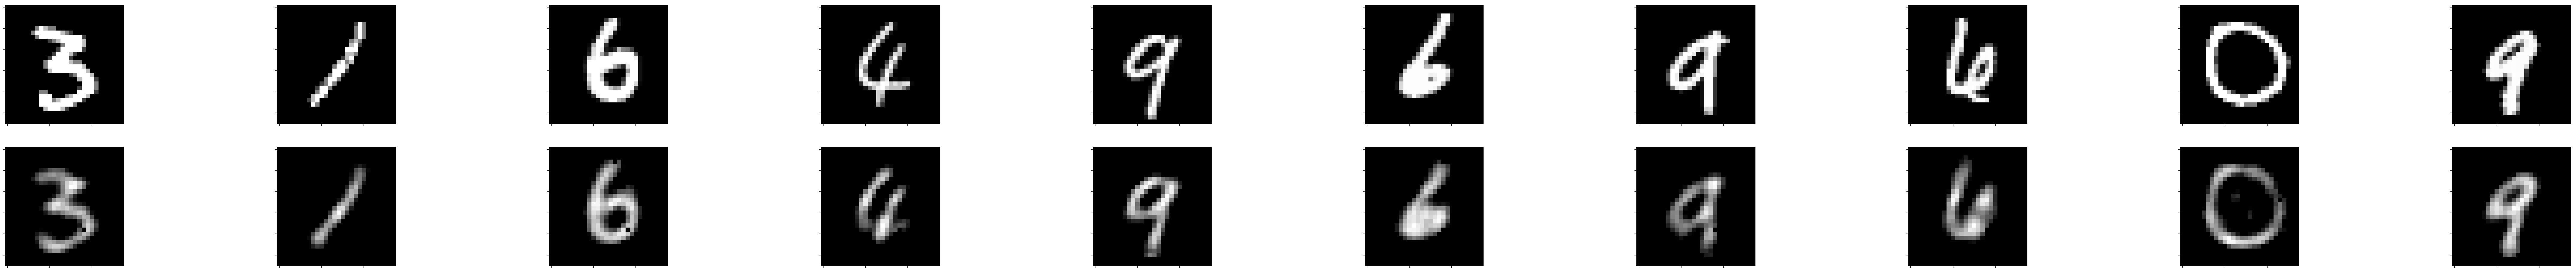

In [21]:
n_images = 10
fig, axs = plt.subplots(2, 10, figsize=(n_images * 8, 8))
for i in range(n_images):
    # original
    ax = axs[0, i]
    ax.imshow(X_test[i+42].reshape(28, 28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # reconstruction
    ax = axs[1, i]
    ax.imshow(X_decoded[i+42].reshape(28, 28), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

---

## (Bonus) Question 4

Using your auto encoder architecture from the previous question, a clean MNIST dataset, and the ideas from the "visual search" notebook can you create a search engine that can find images similar to the query image?

In [ ]:
# your answer here